In [44]:
import os, warnings, sys
import pandas as pd
import pyarrow.parquet as pq
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Qual a influência do número de consultas no pré-natal com peso dos bebês nascidos?

In [45]:
path = 'D:/Disco/Data/datasus'

sim = pq.ParquetDataset(f'{path}/SIM', use_legacy_dataset=False)
sinasc = pq.ParquetDataset(f'{path}/SINASC', use_legacy_dataset=False)

In [4]:
data = pd.DataFrame()
columns = ['LOCNASC', 'CODMUNNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'SEXO', 'RACACOR', 'PESO', 'STATE', 'YEAR']
for file in sinasc.files[:]:
    print(file)
    temp = pd.read_parquet(path=file, columns=columns)
    data = pd.concat([data,temp], ignore_index=True)

del temp

D:/Disco/Data/datasus/SINASC/SINASC_AC_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_AL_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_AM_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_AP_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_BA_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_CE_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_DF_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_ES_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_GO_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_MA_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_MG_1994-2020.parquet
D:/Disco/Data/datasus/SINASC/SINASC_MS_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_MT_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_PA_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_PB_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_PE_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SINASC_PI_1994-2021.parquet
D:/Disco/Data/datasus/SINASC/SI

In [46]:
def decode_estciv(encoded_estciv):
    esc = None
    encoded_estciv = str(encoded_estciv)
    if len(encoded_estciv) > 0:
        unit = encoded_estciv[0]

        if unit == '1':
            esc = 'Solteira'
        elif unit == '2':
            esc = 'Casada'
        elif unit == '3':
            esc = 'Viúva'
        elif unit == '4':
            esc = 'Separada judicialmente/divorciada'
        else:
            esc = None
    
    return esc

def decode_esc(encoded_esc):
    esc = None
    encoded_esc = str(encoded_esc)
    if len(encoded_esc) > 0:
        unit = encoded_esc[0]

        if unit == '1':
            esc = 'Nenhuma'
        elif unit == '2':
            esc = '1 a 3 anos'
        elif unit == '3':
            esc = '4 a 7 anos'
        elif unit == '4':
            esc = '8 a 11 anos'
        elif unit == '5':
            esc = '12 anos ou mais'	
        else:
            esc = None
    
    return esc

def decode_gestacao(encoded_gestacao):
    esc = None
    encoded_gestacao = str(encoded_gestacao)
    if len(encoded_gestacao) > 0:
        unit = encoded_gestacao[0]

        if unit == '1':
            esc = 'Menos de 22 semanas'
        elif unit == '2':
            esc = '22 a 27 semanas'
        elif unit == '3':
            esc = '28 a 31 semanas'
        elif unit == '4':
            esc = '32 a 36 semanas'
        elif unit == '5':
            esc = '37 a 41 semanas'
        elif unit == '6':
            esc = '42 semanas ou mais'	
        else:
            esc = None
    
    return esc

def decode_sex(encoded_sex):
    esc = None
    encoded_sex = str(encoded_sex)
    if len(encoded_sex) > 0:
        unit = encoded_sex[0]

        if unit == '1':
            esc = 'Masculino'
        elif unit == '2':
            esc = 'Feminino'	
        else:
            esc = None
    
    return esc

def decode_parto(encoded_parto):
    esc = None
    encoded_parto = str(encoded_parto)
    if len(encoded_parto) > 0:
        unit = encoded_parto[0]

        if unit == '1':
            esc = 'Normal'
        elif unit == '2':
            esc = 'Cesáreo'	
        else:
            esc = None
    
    return esc

def decode_consultas(encoded_consultas):
    esc = None
    encoded_consultas = str(encoded_consultas)
    if len(encoded_consultas) > 0:
        unit = encoded_consultas[0]

        if unit == '1':
            esc = 'Nenhuma'
        elif unit == '2':
            esc = '1 a 3'
        elif unit == '3':
            esc = '4 a 6'
        elif unit == '4':
            esc = '7 e mais'
        else:
            esc = None
    
    return esc

def decode_racacor(encoded_racacor):
    esc = None
    encoded_racacor = str(encoded_racacor)
    if len(encoded_racacor) > 0:
        unit = encoded_racacor[0]

        if unit == '1':
            esc = 'Branca'
        elif unit == '2':
            esc = 'Preta'
        elif unit == '3':
            esc = 'Amarela'
        elif unit == '4':
            esc = 'Parda'
        elif unit == '5':
            esc = 'Indígena'
        else:
            esc = None
    
    return esc

def set_regiao(estado):
    regioes = {
        'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
        'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
        'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
        'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
        'Sul': ['PR', 'RS', 'SC']
    }
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return None


In [6]:
data['IDADEMAE'] = pd.to_numeric(data['IDADEMAE'], errors='coerce', downcast='integer')
data['ESTCIVMAE'] = data['ESTCIVMAE'].apply(decode_estciv)
data['ESCMAE'] = pd.to_numeric(data['ESCMAE'], errors='coerce', downcast='integer')
data['ESCMAED'] = data['ESCMAE'].apply(decode_esc)
data['CODOCUPMAE'] = pd.to_numeric(data['CODOCUPMAE'], errors='coerce', downcast='integer')
data['QTDFILVIVO'] = pd.to_numeric(data['QTDFILVIVO'], errors='coerce', downcast='integer')
data['QTDFILMORT'] = pd.to_numeric(data['QTDFILMORT'], errors='coerce', downcast='integer')
data['GESTACAO'] = pd.to_numeric(data['GESTACAO'], errors='coerce', downcast='integer')
data['GESTACAOD'] = data['GESTACAO'].apply(decode_gestacao)
data['GRAVIDEZ'] = pd.to_numeric(data['GRAVIDEZ'], errors='coerce', downcast='integer')
data['PARTO'] = data['PARTO'].apply(decode_parto)
data['CONSULTAS'] = pd.to_numeric(data['CONSULTAS'], errors='coerce', downcast='integer')
data['CONSULTASD'] = data['CONSULTAS'].apply(decode_consultas)
data['DTNASC'] = pd.to_datetime(data['DTNASC'], format='%d%m%Y', errors='coerce')
data['SEXO'] = data['SEXO'].apply(decode_sex)
data['RACACOR'] = data['RACACOR'].apply(decode_racacor)
data['PESO'] = pd.to_numeric(data['PESO'], errors='coerce', downcast='integer')
data['REGIAO'] = data['STATE'].apply(set_regiao)
data['nascimento_prematuro'] = data['GESTACAO'].apply(lambda x: 1 if x <= 4 else 0)
data['peso_baixo'] = data['PESO'].apply(lambda x: 1 if x < 2500 else 0)


In [7]:
#data.to_parquet(f'{path}/SINASC.parquet')
data = pd.read_parquet(f'{path}/SINASC.parquet')

In [ ]:
data.sample(frac=.30).head(50).to_clipboard()

In [47]:
data[['PESO']].describe()

,PESO
count,8.071403e+07
mean,3.184261e+03
std,5.546997e+02
min,0.000000e+00
25%,2.900000e+03
50%,3.200000e+03
75%,3.520000e+03
max,9.850000e+03


In [78]:
#remove os dados com peso 9999
data = data[data['PESO'] != 9999]
data = data[data['QTDFILVIVO'] != 99]

In [79]:
data.groupby(by=['IDADEMAE'])['QTDFILVIVO'].describe()

,count,mean,std,min,25%,50%,75%,max
IDADEMAE,,,,,,,,
0.0,96.0,0.895833,0.923143,0.0,0.0,1.0,1.00,4.0
8.0,7.0,0.571429,0.786796,0.0,0.0,0.0,1.00,2.0
9.0,8.0,0.250000,0.707107,0.0,0.0,0.0,0.00,2.0
10.0,524.0,0.801527,1.437918,0.0,0.0,0.0,1.00,12.0
11.0,2206.0,0.346328,0.831741,0.0,0.0,0.0,0.00,11.0
12.0,14533.0,0.154820,0.528154,0.0,0.0,0.0,0.00,11.0
13.0,95455.0,0.070787,0.317373,0.0,0.0,0.0,0.00,13.0
14.0,403650.0,0.079502,0.314353,0.0,0.0,0.0,0.00,22.0
15.0,1020730.0,0.116559,0.384271,0.0,0.0,0.0,0.00,30.0


In [80]:
print('Total de registros: ', len(data))

#media de peso por consultas
avg_w_consultas = data.groupby(by=['CONSULTASD'])['PESO'].mean()

#media de peso estado
avg_w_state = data.groupby(by=['STATE'])['PESO'].mean()

#media de peso regiao
avg_w_regiao = data.groupby(by=['REGIAO'])['PESO'].mean()

#media de peso por escolaridade
avg_w_escolaridade = data.groupby(by=['ESCMAED'])['PESO'].mean()

#quantidade de filhos por relacionamento
avg_qt_relacionamento = data.groupby('ESTCIVMAE')['QTDFILVIVO'].mean()

#quantidade de filhos por idade da mae
avg_qt_idademae = data.groupby('IDADEMAE')['QTDFILVIVO'].mean()


print('Média de peso por consultas:')
display(pd.DataFrame(avg_w_consultas))

#media de peso por estado
print('\nMédia de peso por estado:')
display(pd.DataFrame(avg_w_state))

#media de peso por regiao
print('\nMédia de peso por regiao:')
display(pd.DataFrame(avg_w_regiao))

#media de peso por escolaridade
print('\nMédia de peso por escolaridade:')
display(pd.DataFrame(avg_w_escolaridade))

#quantidade de filhos por idade da mae
print('\nQuantidade de filhos por idade da mãe:')
display(pd.DataFrame(avg_qt_idademae))


Total de registros:  80540460
Média de peso por consultas:


,PESO
CONSULTASD,
1 a 3,3047.832733
4 a 6,3149.802980
7 e mais,3227.882873
Nenhuma,3045.483543



Média de peso por estado:


,PESO
STATE,
AC,3227.041338
AL,3224.317348
AM,3218.227529
AP,3187.806335
BA,3201.440929
CE,3235.802797
DF,3147.489972
ES,3220.040988
GO,3183.161082



Média de peso por regiao:


,PESO
REGIAO,
Centro-Oeste,3186.361051
Nordeste,3223.035234
Norte,3221.750905
Sudeste,3146.636153
Sul,3185.426446



Média de peso por escolaridade:


,PESO
ESCMAED,
1 a 3 anos,3192.105702
12 anos ou mais,3180.982950
4 a 7 anos,3179.933381
8 a 11 anos,3186.962277
Nenhuma,3187.200404



Quantidade de filhos por idade da mãe:


,QTDFILVIVO
IDADEMAE,
0.0,0.895833
8.0,0.571429
9.0,0.250000
10.0,0.801527
11.0,0.346328
12.0,0.154820
13.0,0.070787
14.0,0.079502
15.0,0.116559


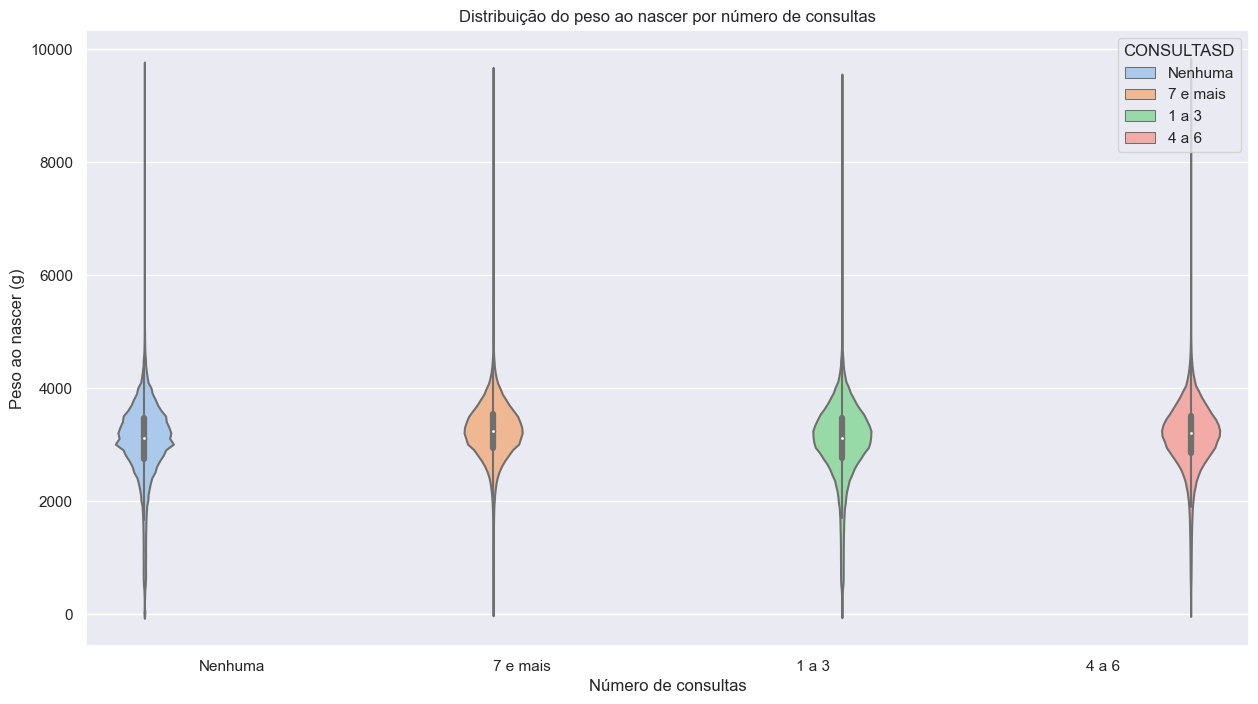

In [73]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=data, x='CONSULTASD', y='PESO', hue='CONSULTASD', pallete='Blues_d')

plt.title('Distribuição do peso ao nascer por número de consultas')
plt.xlabel('Número de consultas')
plt.ylabel('Peso ao nascer (g)')

plt.show()

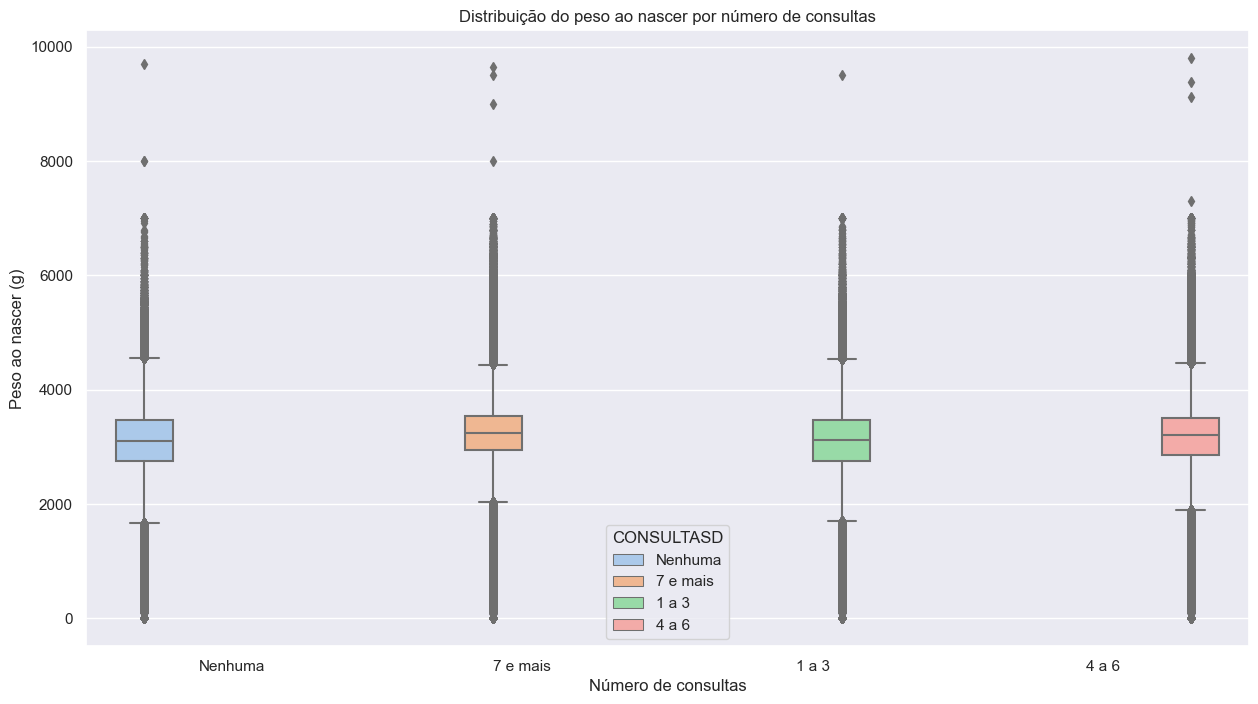

In [75]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='CONSULTASD', y='PESO', hue='CONSULTASD')

plt.title('Distribuição do peso ao nascer por número de consultas')
plt.xlabel('Número de consultas')
plt.ylabel('Peso ao nascer (g)')

plt.show()

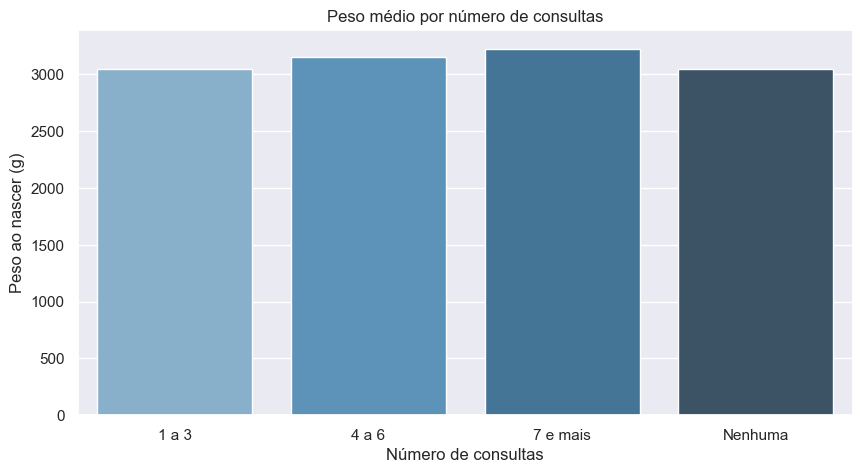

In [68]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_w_consultas.index, y=avg_w_consultas.values, palette='Blues_d')

plt.title('Peso médio por número de consultas')
plt.xlabel('Número de consultas')
plt.ylabel('Peso ao nascer (g)')
plt.show()

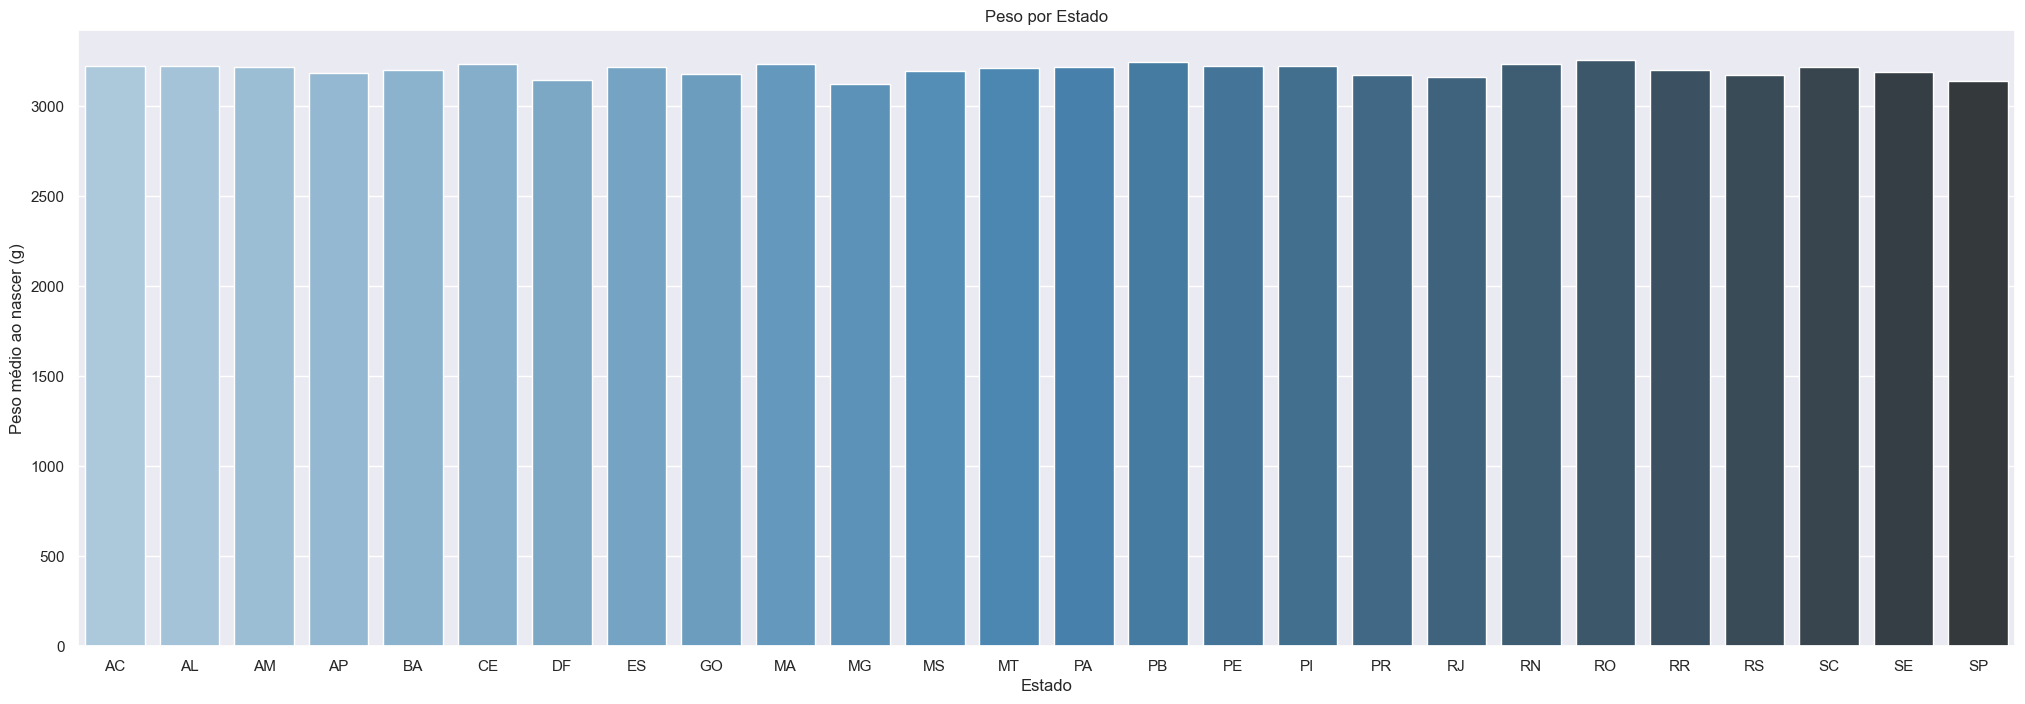

In [71]:
plt.figure(figsize=(25, 8))
sns.barplot(data=avg_w_state.reset_index(), x='STATE', y='PESO', palette='Blues_d')

plt.title('Peso por Estado')
plt.xlabel('Estado')
plt.ylabel('Peso médio ao nascer (g)')
plt.show()


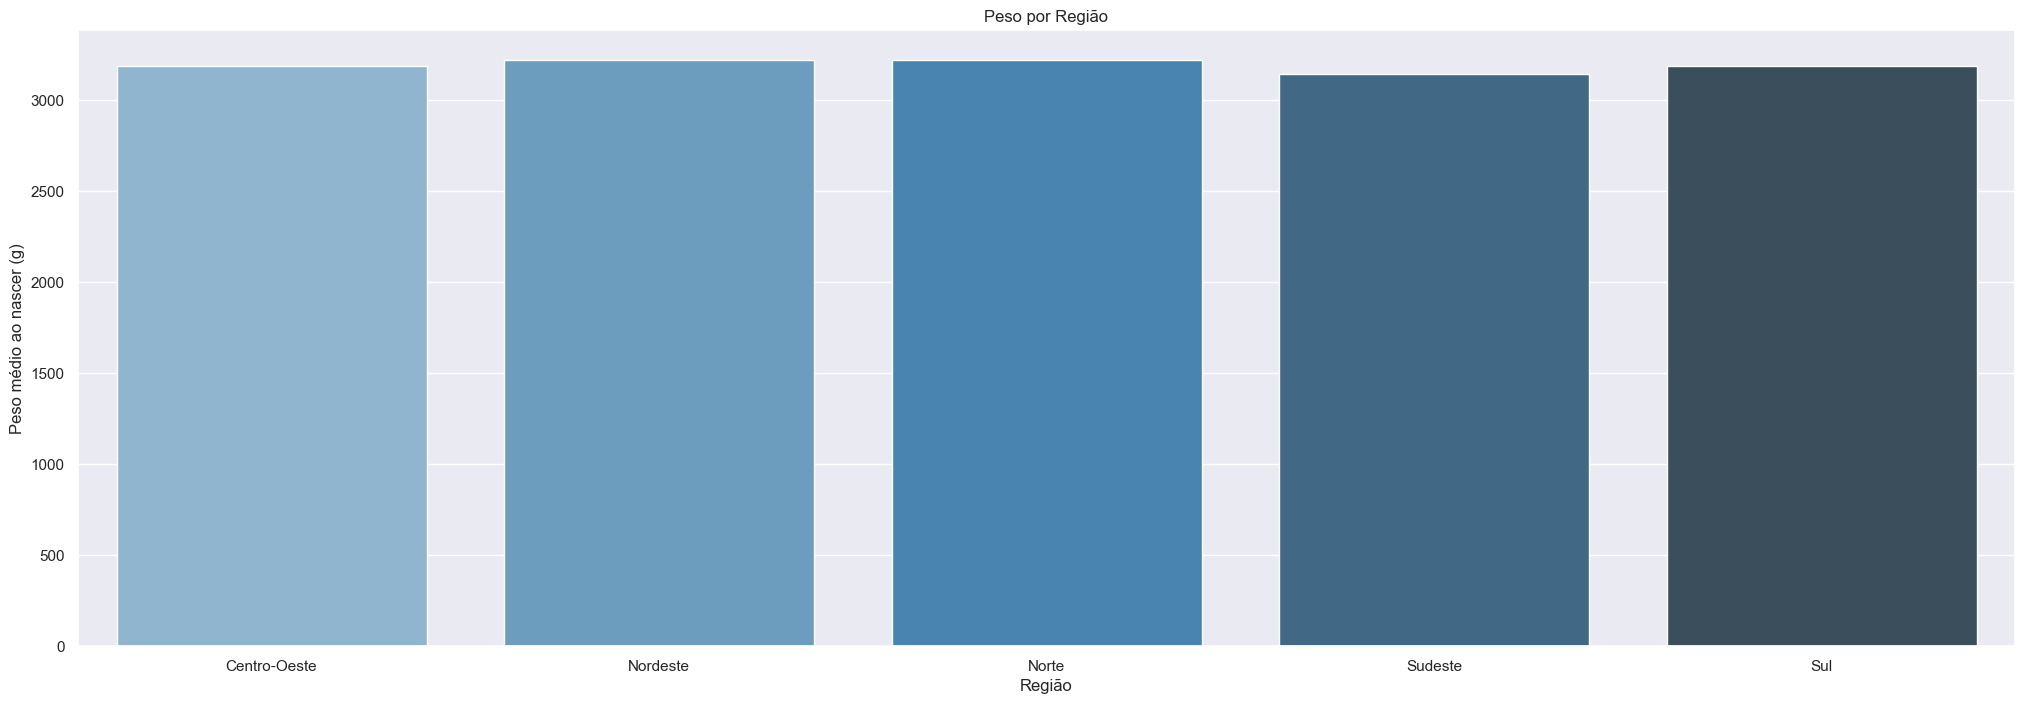

In [76]:
plt.figure(figsize=(25, 8))
sns.barplot(data=avg_w_regiao.reset_index(), x='REGIAO', y='PESO', palette='Blues_d')

plt.title('Peso por Região')
plt.xlabel('Região')
plt.ylabel('Peso médio ao nascer (g)')
plt.show()

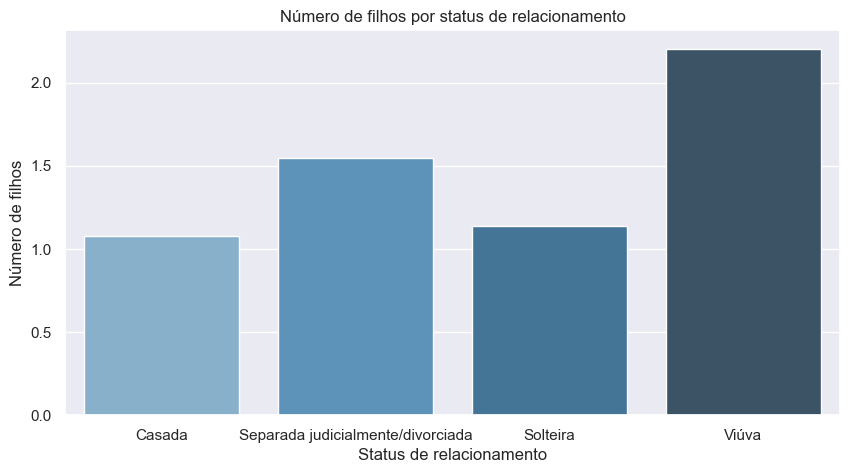

In [81]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_qt_relacionamento.index, y=avg_qt_relacionamento.values, palette='Blues_d')

plt.title('Número de filhos por status de relacionamento')
plt.xlabel('Status de relacionamento')
plt.ylabel('Número de filhos')
plt.show()

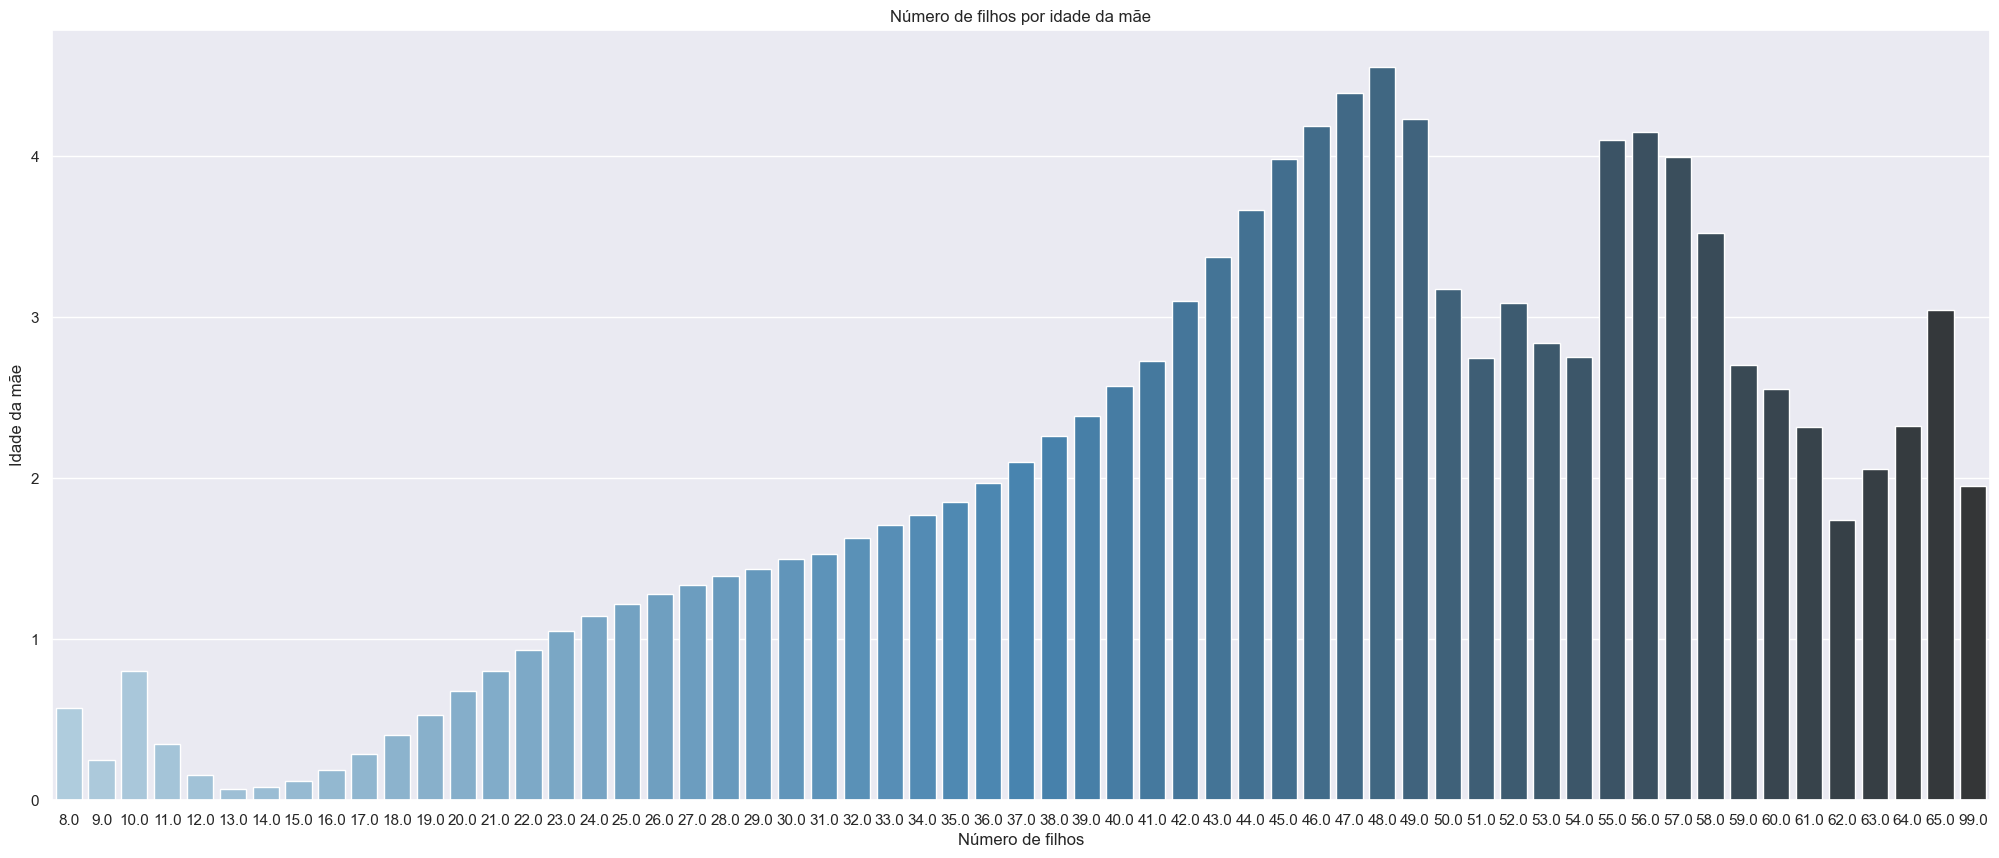

In [82]:
plt.figure(figsize=(25, 10))
sns.barplot(x=avg_qt_idademae.index[1:], y=avg_qt_idademae.values[1:], palette='Blues_d')

plt.title('Número de filhos por idade da mãe')
plt.xlabel('Número de filhos')
plt.ylabel('Idade da mãe')
plt.show()